setting up the google Drive

In [163]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Reading Source files from Google Drive

In [164]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

Images file 

In [165]:
images= project_path + 'images.npy'

Lables File

In [166]:
lables=project_path + 'Labels.csv'

Importing Tensorflow

In [167]:
import tensorflow as tf
print(tf.__version__)

2.4.0


Importing all the required Libraries

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,roc_auc_score,roc_curve,classification_report
from tensorflow.keras import datasets, models, layers, optimizers
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import cv2



Loading data and validating the shapes

In [169]:
df_lables=pd.read_csv(lables)

In [170]:
df_lables.shape

(4750, 1)

In [171]:
df_lables.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [172]:
df_images=np.load(images)

In [173]:
df_images.shape

(4750, 128, 128, 3)

Generating sample images

0
Label    Small-flowered Cranesbill
Name: 0, dtype: object


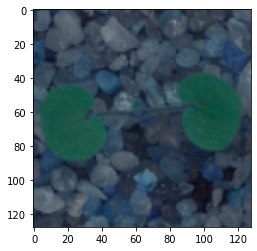

5
Label    Small-flowered Cranesbill
Name: 5, dtype: object


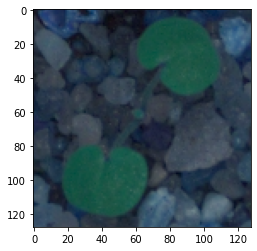

10
Label    Small-flowered Cranesbill
Name: 10, dtype: object


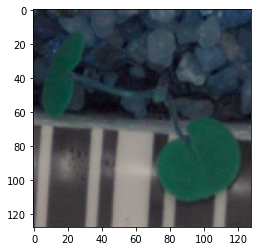

15
Label    Small-flowered Cranesbill
Name: 15, dtype: object


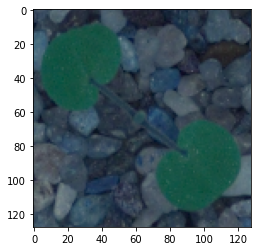

20
Label    Small-flowered Cranesbill
Name: 20, dtype: object


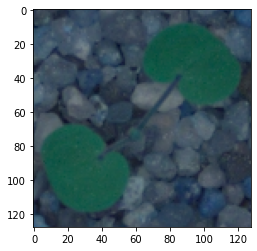

25
Label    Small-flowered Cranesbill
Name: 25, dtype: object


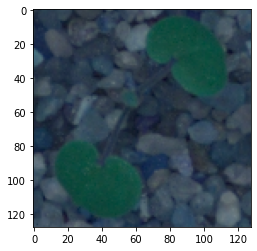

30
Label    Small-flowered Cranesbill
Name: 30, dtype: object


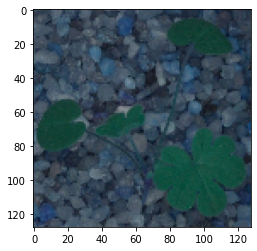

35
Label    Small-flowered Cranesbill
Name: 35, dtype: object


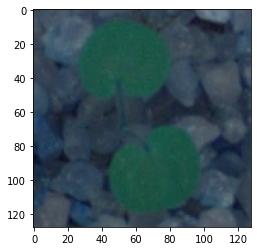

40
Label    Small-flowered Cranesbill
Name: 40, dtype: object


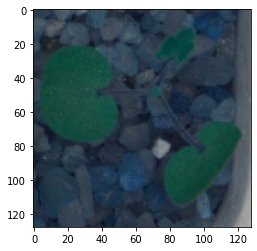

45
Label    Small-flowered Cranesbill
Name: 45, dtype: object


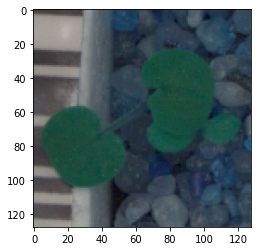

In [174]:

for i in range(0,50,5):
  print (i)
  print ( df_lables.iloc[i]) 
  plt.imshow(df_images[i])
  plt.show()
 
  

**Data Preprocessing**


Normailization - Diving all values with 255, as pixel valus can rang from 0-255, bringing all the data in the range of 0-1

In [175]:
# Normalize the data
df_images = df_images.astype('float32') / 255.0

**Gaussian Blurring** 

In [176]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
df_images_new = np.empty((4750, 128, 128, 3)) 

In [177]:
len(df_images), len(df_images_new)

(4750, 4750)

In [178]:
df_images.shape, df_images_new.shape

((4750, 128, 128, 3), (4750, 128, 128, 3))

In [179]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(df_images):
  df_images_new[idx] = cv2.GaussianBlur(img, (5, 5), 0)

Plotting Images before and after Gaussian Blurring

0
Label    Small-flowered Cranesbill
Name: 0, dtype: object


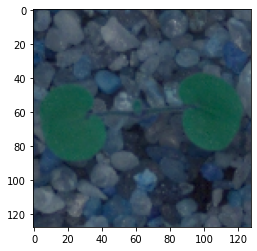

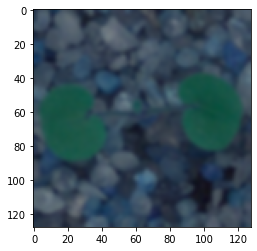

5
Label    Small-flowered Cranesbill
Name: 5, dtype: object


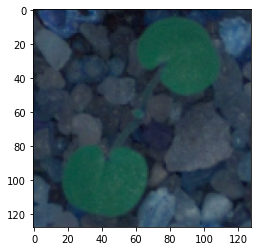

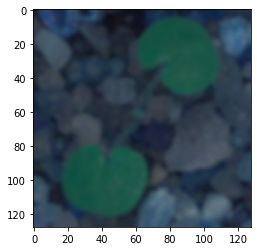

10
Label    Small-flowered Cranesbill
Name: 10, dtype: object


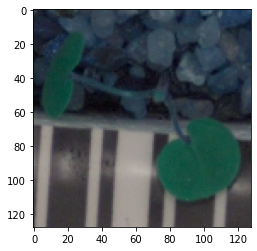

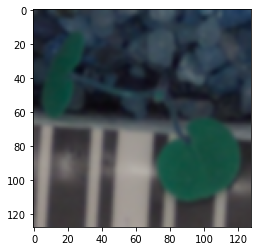

15
Label    Small-flowered Cranesbill
Name: 15, dtype: object


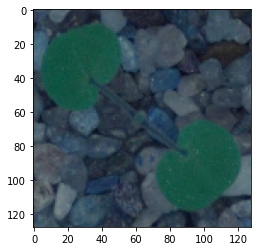

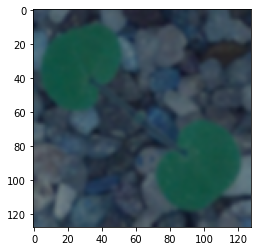

20
Label    Small-flowered Cranesbill
Name: 20, dtype: object


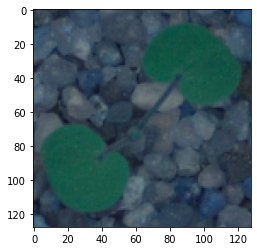

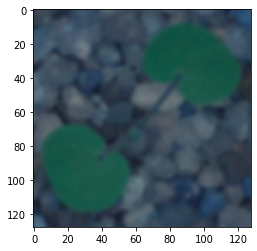

25
Label    Small-flowered Cranesbill
Name: 25, dtype: object


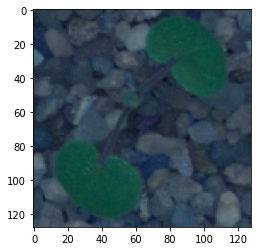

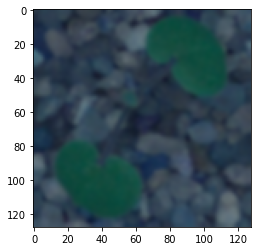

30
Label    Small-flowered Cranesbill
Name: 30, dtype: object


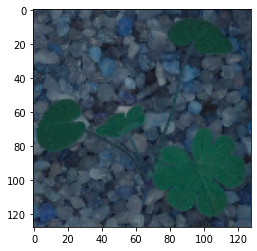

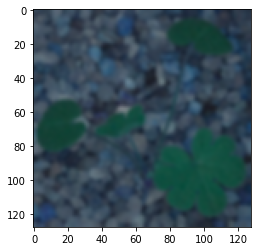

35
Label    Small-flowered Cranesbill
Name: 35, dtype: object


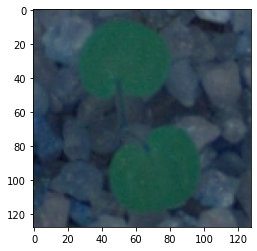

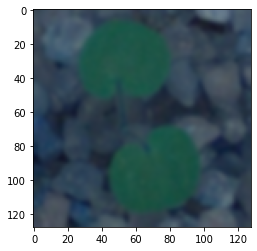

40
Label    Small-flowered Cranesbill
Name: 40, dtype: object


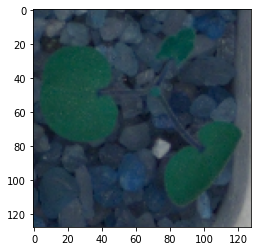

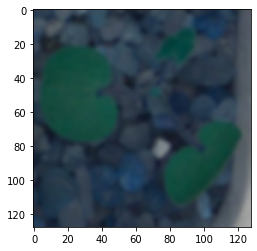

45
Label    Small-flowered Cranesbill
Name: 45, dtype: object


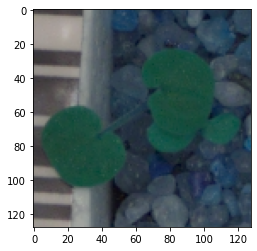

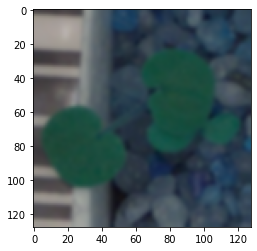

In [180]:
for i in range(0,50,5):
  print (i)
  print ( df_lables.iloc[i]) 
  plt.imshow(df_images[i])
  plt.show()
  plt.imshow(df_images_new[i])
  plt.show()
  


In [181]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(df_images):
  df_images_new[idx] = cv2.GaussianBlur(img, (7, 7), 0)

0
Label    Small-flowered Cranesbill
Name: 0, dtype: object


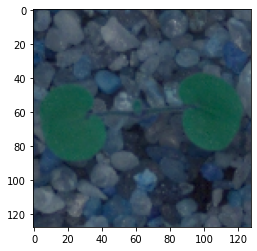

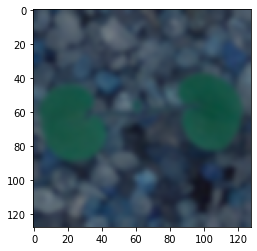

5
Label    Small-flowered Cranesbill
Name: 5, dtype: object


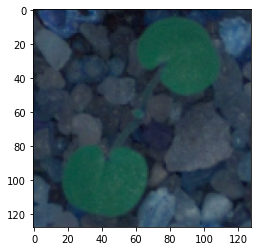

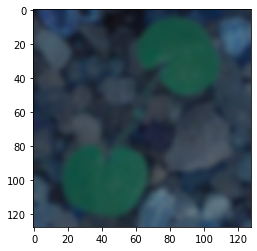

10
Label    Small-flowered Cranesbill
Name: 10, dtype: object


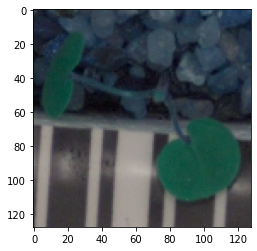

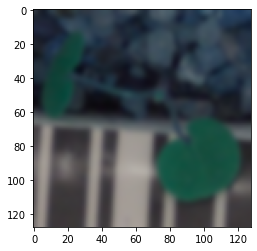

15
Label    Small-flowered Cranesbill
Name: 15, dtype: object


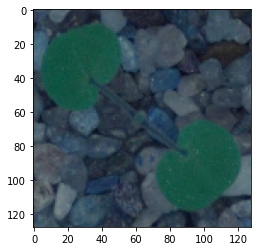

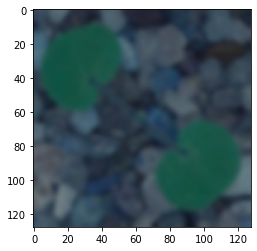

20
Label    Small-flowered Cranesbill
Name: 20, dtype: object


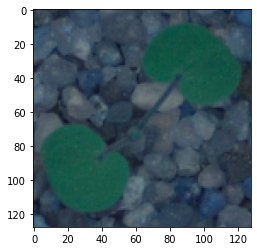

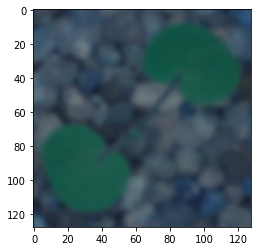

25
Label    Small-flowered Cranesbill
Name: 25, dtype: object


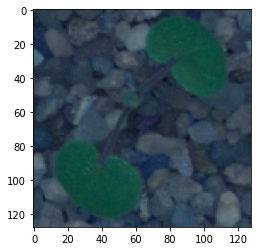

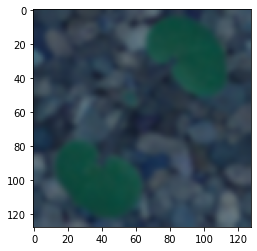

30
Label    Small-flowered Cranesbill
Name: 30, dtype: object


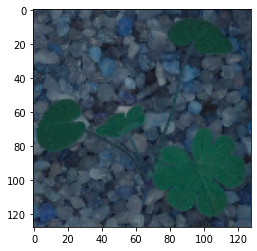

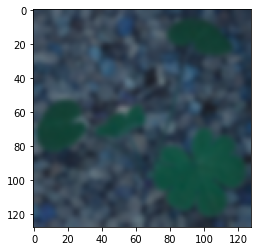

35
Label    Small-flowered Cranesbill
Name: 35, dtype: object


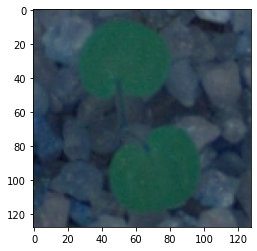

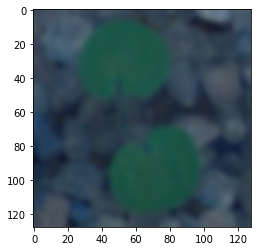

40
Label    Small-flowered Cranesbill
Name: 40, dtype: object


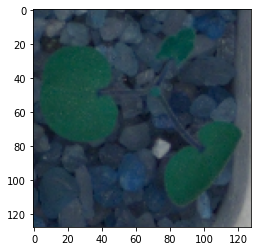

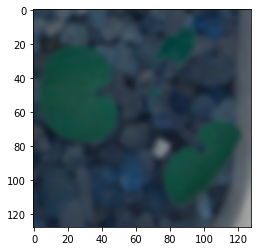

45
Label    Small-flowered Cranesbill
Name: 45, dtype: object


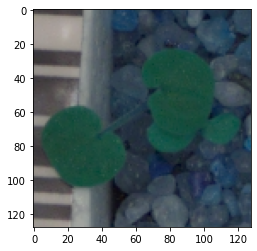

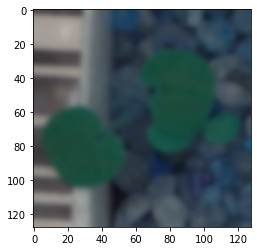

In [182]:
for i in range(0,50,5):
  print (i)
  print ( df_lables.iloc[i]) 
  plt.imshow(df_images[i])
  plt.show()
  plt.imshow(df_images_new[i])
  plt.show()

***Convert labels to one-hot-vectors***

In [183]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
df_lables = enc.fit_transform(df_lables)


In [184]:
df_lables.shape

(4750, 12)

In [185]:
df_lables[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Split the dataset into training, testing, and validation set

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df_images_new, df_lables, train_size=0.7, random_state=9)

In [187]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.5, random_state=9)

In [188]:
X_train.shape, X_validation.shape,X_test.shape,y_train.shape, y_validation.shape, y_test.shape

((1662, 128, 128, 3),
 (1663, 128, 128, 3),
 (1425, 128, 128, 3),
 (1662, 12),
 (1663, 12),
 (1425, 12))

These images are COlored and Sahpe is 3 Dimientional representing RGB  so  need to reshape the Train/Validation/Test Data. 

In [189]:
# Creating CNN model -1


model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())

model.add(layers.Dense(256, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_21 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)       

In [190]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=64, epochs=20 )

Epoch 1/20
26/26 [==============================] - 85s 3s/step - loss: 7.5022 - accuracy: 0.1144
Epoch 2/20
26/26 [==============================] - 84s 3s/step - loss: 2.6417 - accuracy: 0.2115
Epoch 3/20
26/26 [==============================] - 84s 3s/step - loss: 1.9570 - accuracy: 0.3390
Epoch 4/20
26/26 [==============================] - 84s 3s/step - loss: 1.7821 - accuracy: 0.3671
Epoch 5/20
26/26 [==============================] - 85s 3s/step - loss: 1.6537 - accuracy: 0.4406
Epoch 6/20
26/26 [==============================] - 85s 3s/step - loss: 1.5726 - accuracy: 0.4406
Epoch 7/20
26/26 [==============================] - 84s 3s/step - loss: 1.5218 - accuracy: 0.4756
Epoch 8/20
26/26 [==============================] - 83s 3s/step - loss: 1.4391 - accuracy: 0.5187
Epoch 9/20
26/26 [==============================] - 84s 3s/step - loss: 1.4037 - accuracy: 0.5036
Epoch 10/20
26/26 [==============================] - 83s 3s/step - loss: 1.3935 - accuracy: 0.5232
Epoch 11/20
26/26 [

In [191]:
model.evaluate(X_validation, y_validation)

52/52 [==============================] - 23s 434ms/step - loss: 2.2003 - accuracy: 0.2471


[2.2002837657928467, 0.2471437156200409]

changing the batch size from 64 to 32 and #of Epochs from 10 to 25

In [192]:
# Fit the model

model.fit( x=X_train, y=y_train, batch_size=32, epochs=25 )

Epoch 1/25
52/52 [==============================] - 86s 2s/step - loss: 1.0934 - accuracy: 0.6270
Epoch 2/25
52/52 [==============================] - 85s 2s/step - loss: 1.1404 - accuracy: 0.6029
Epoch 3/25
52/52 [==============================] - 85s 2s/step - loss: 1.1436 - accuracy: 0.6258
Epoch 4/25
52/52 [==============================] - 86s 2s/step - loss: 1.0673 - accuracy: 0.6534
Epoch 5/25
52/52 [==============================] - 85s 2s/step - loss: 1.0300 - accuracy: 0.6444
Epoch 6/25
52/52 [==============================] - 85s 2s/step - loss: 1.0065 - accuracy: 0.6558
Epoch 7/25
52/52 [==============================] - 86s 2s/step - loss: 0.9631 - accuracy: 0.6829
Epoch 8/25
52/52 [==============================] - 86s 2s/step - loss: 0.9434 - accuracy: 0.6667
Epoch 9/25
52/52 [==============================] - 85s 2s/step - loss: 0.9010 - accuracy: 0.6998
Epoch 10/25
52/52 [==============================] - 86s 2s/step - loss: 0.8789 - accuracy: 0.6925
Epoch 11/25
52/52 [

before chaing the hyper parameters validating the model on Validation data.

In [193]:
model.evaluate(X_validation, y_validation)

52/52 [==============================] - 22s 423ms/step - loss: 1.1212 - accuracy: 0.6043


[1.1211979389190674, 0.604329526424408]

 we will change the layers in the Model and validate again.

In [194]:
# Creating CNN model -2 


model2 = models.Sequential()

model2.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.4))

model2.add(Flatten())

model2.add(layers.Dense(1000, activation="relu"))


model2.add(layers.Dense(12, activation="softmax"))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_25 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_26 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 64)       

In [195]:
# Compile the model
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model2.fit( x=X_train, y=y_train, batch_size=32, epochs=10 )

Epoch 1/10
52/52 [==============================] - 89s 2s/step - loss: 12.8479 - accuracy: 0.2138
Epoch 2/10
52/52 [==============================] - 89s 2s/step - loss: 1.5698 - accuracy: 0.6172
Epoch 3/10
52/52 [==============================] - 88s 2s/step - loss: 0.7126 - accuracy: 0.7960
Epoch 4/10
52/52 [==============================] - 88s 2s/step - loss: 0.3691 - accuracy: 0.8864
Epoch 5/10
52/52 [==============================] - 88s 2s/step - loss: 0.3263 - accuracy: 0.9031
Epoch 6/10
52/52 [==============================] - 89s 2s/step - loss: 0.1923 - accuracy: 0.9384
Epoch 7/10
52/52 [==============================] - 89s 2s/step - loss: 0.1251 - accuracy: 0.9631
Epoch 8/10
52/52 [==============================] - 89s 2s/step - loss: 0.1183 - accuracy: 0.9653
Epoch 9/10
52/52 [==============================] - 89s 2s/step - loss: 0.1321 - accuracy: 0.9550
Epoch 10/10
52/52 [==============================] - 88s 2s/step - loss: 0.0646 - accuracy: 0.9808


In [196]:
# Evaluating Model2 with Validation data
model2.evaluate(X_validation, y_validation)

52/52 [==============================] - 23s 446ms/step - loss: 6.1951 - accuracy: 0.4342


[6.195125102996826, 0.434155136346817]

We notice the Accuarcy on Train and Validation data are good in model1 so proceeding with 1st Model i.e model

In [197]:
# Evaluating Model2 with Test data
model.evaluate(X_test, y_test)

45/45 [==============================] - 19s 430ms/step - loss: 1.1060 - accuracy: 0.6168


[1.1060023307800293, 0.6168420910835266]

In [198]:
# Predicting target Values for Test data using Model2
y_pred = model.predict(X_test)



In [199]:
y_pred

array([[1.26036867e-01, 6.16388803e-04, 6.95117237e-03, ...,
        1.30695512e-03, 1.22328370e-03, 2.20359471e-02],
       [6.51036447e-04, 4.54679541e-02, 1.68572757e-02, ...,
        3.05670630e-02, 1.96650743e-01, 2.79843435e-02],
       [1.80628628e-03, 4.09511365e-02, 3.67120914e-02, ...,
        7.23252119e-03, 1.02694236e-01, 5.41731380e-02],
       ...,
       [1.41729298e-03, 1.25674739e-01, 1.04151912e-01, ...,
        1.14393532e-02, 1.65995196e-01, 6.14797100e-02],
       [2.56514270e-03, 2.39580885e-01, 2.35225707e-01, ...,
        6.15300518e-03, 7.84280971e-02, 1.75642632e-02],
       [1.66940242e-01, 2.37374858e-04, 5.16154163e-04, ...,
        3.57617019e-03, 1.49338203e-03, 1.83393490e-02]], dtype=float32)

In [201]:
# printing Clasification Report
print (classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.58      0.08      0.15        83
           1       0.92      0.59      0.72       120
           2       0.69      0.67      0.68        90
           3       0.92      0.57      0.71       166
           4       0.82      0.58      0.68        62
           5       0.31      0.92      0.47       135
           6       0.67      0.94      0.79       208
           7       0.92      0.63      0.75        70
           8       0.82      0.21      0.33       150
           9       0.75      0.08      0.15        74
          10       0.59      0.85      0.70       158
          11       0.77      0.68      0.72       109

    accuracy                           0.62      1425
   macro avg       0.73      0.57      0.57      1425
weighted avg       0.72      0.62      0.59      1425



In [202]:
# Printing Confusion Matrix
print("=== Confusion Matrix ===")
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))

=== Confusion Matrix ===


array([[  7,   0,   0,   0,   3,   4,  67,   0,   0,   0,   0,   2],
       [  0,  71,  21,   0,   0,  18,   0,   2,   1,   0,   7,   0],
       [  0,   0,  60,   0,   2,  27,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,  95,   0,  35,   0,   0,   0,   0,  36,   0],
       [  3,   0,   0,   0,  36,  11,  11,   0,   0,   0,   0,   1],
       [  1,   2,   1,   1,   1, 124,   3,   0,   1,   0,   0,   1],
       [  1,   0,   0,   0,   0,  11, 196,   0,   0,   0,   0,   0],
       [  0,   2,   0,   1,   0,   4,   3,  44,   1,   0,  10,   5],
       [  0,   1,   2,   0,   2,  82,  10,   1,  31,   2,   6,  13],
       [  0,   0,   0,   4,   0,  29,   0,   0,   4,   6,  31,   0],
       [  0,   0,   1,   0,   0,  22,   0,   0,   0,   0, 135,   0],
       [  0,   1,   2,   2,   0,  27,   1,   1,   0,   0,   1,  74]])

Comparing and visualizing the Predicitions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

Actual value for X_test[2]:[0 0 0 0 0 1 0 0 0 0 0 0]
Predicted Value for X_test[2]:[0.00180629 0.04095114 0.03671209 0.00490238 0.00574435 0.7212767
 0.00153678 0.01653383 0.00643662 0.00723252 0.10269424 0.05417314]


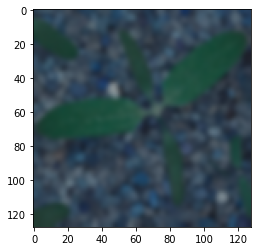

In [203]:
#x_test[2]

print('Actual value for X_test[2]:' + str(y_test[2]) )
print('Predicted Value for X_test[2]:' + str(y_pred[2]) )
plt.imshow(X_test[2])
plt.show()


Actual Value is 6th one and Predicted also 6 th one

Actual value for X_test[3]:[0 1 0 0 0 0 0 0 0 0 0 0]
Predicted Value for X_test[3]:[0.00211164 0.487275   0.10952822 0.00363526 0.0052312  0.14777122
 0.00161074 0.09892414 0.02108058 0.02344345 0.0613171  0.03807143]


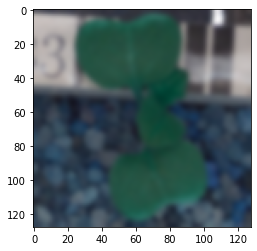

In [204]:
# x_test[3]

print('Actual value for X_test[3]:' + str(y_test[3]) )
print('Predicted Value for X_test[3]:' + str(y_pred[3]))
plt.imshow(X_test[3])
plt.show()

Actual Value is 2nd one and Predicted also 2nd one

Actual value for X_test[33]:[0 0 0 0 0 0 0 1 0 0 0 0]
Actual Value for X_test[33]:[0.0060533  0.0012142  0.00082661 0.06583914 0.08933021 0.03439118
 0.04554046 0.6514213  0.02425317 0.00375422 0.00583064 0.07154568]


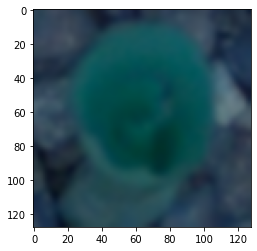

In [205]:
# x_test[33]

print('Actual value for X_test[33]:'  + str(y_test[33]))
print('Actual Value for X_test[33]:' + str(y_pred[33]))
plt.imshow(X_test[33])
plt.show()

Actual Value is 8th one and Predicted also 8th one

Actual value for X_test[36]:[0 0 0 1 0 0 0 0 0 0 0 0]
Actual Value for X_test[36]:[3.89963039e-04 5.90588897e-04 1.10751258e-04 5.95913887e-01
 3.56645498e-04 7.74933100e-02 4.10463382e-03 1.04116965e-02
 2.40495102e-03 1.27890911e-02 2.87728280e-01 7.70618068e-03]


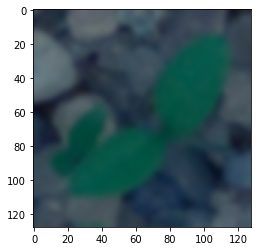

In [206]:
# x_test[36]

print('Actual value for X_test[36]:' + str(y_test[36]))
print('Actual Value for X_test[36]:' + str(y_pred[36]))
plt.imshow(X_test[36])
plt.show()

Actual Value is 4th one and Predicted also 4th one

Actual value for X_test[59]:[0 0 0 0 0 1 0 0 0 0 0 0]
Actual Value for X_test[59]:[1.9041035e-02 7.7144284e-04 4.5518754e-03 2.0289121e-03 2.7569603e-02
 8.9775431e-01 1.6839111e-02 2.5368067e-03 5.0166873e-03 1.3532364e-03
 7.7124499e-03 1.4824556e-02]


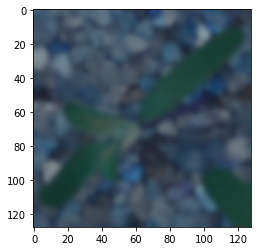

In [207]:
#x_test[59]

print('Actual value for X_test[59]:' + str(y_test[59]))
print('Actual Value for X_test[59]:' + str(y_pred[59]))
plt.imshow(X_test[59])
plt.show()

Actual Value is 6th one and Predicted also 6th one